# Exploring the MNIST Digits Dataset

## Importing Data

In [21]:
#!pip install --quiet kfp==1.8.22 tensorflow==2.3.0
!pip install --quiet kfp==2.0.1 tensorflow==2.9.3

In [2]:
!pip uninstall -y --quiet kfp==1.8.22


In [20]:
!pip uninstall -y --quiet tensorflow==2.3.0

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Exploring Data

In [23]:
# check shape of the data

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


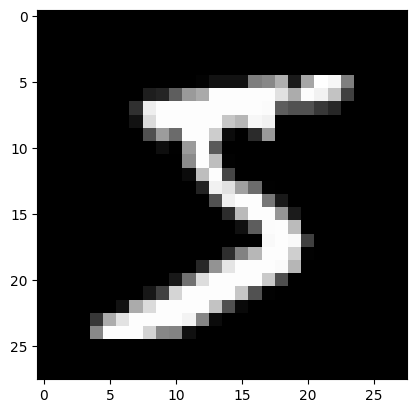

correct number: 5


In [24]:
# visualize single data instances

img_no = 0 #change the number to display other examples

first_number = x_train[img_no]
plt.imshow(first_number, cmap='gray') # visualize the numbers in gray mode
plt.show()
print(f"correct number: {y_train[img_no]}")

## Preparing Data & Splitting

In [25]:
# reshaping the data
# reshaping pixels in a 28x28px image with greyscale, canal = 1. This is needed for the Keras API
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

# normalizing the data
# each pixel has a value between 0-255. Here we divide by 255, to get values from 0-1
x_train = x_train / 255
x_test = x_test / 255

print(f"train X shape: {x_train.shape}")
print(f"test X shape: {x_test.shape}")

train X shape: (60000, 28, 28, 1)
test X shape: (10000, 28, 28, 1)


In [7]:
# new functions

## Model Building

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Conv2D(10, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Conv2D(10, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='relu'))

model.add(keras.layers.Dense(10, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax')) #output are 10 classes, numbers from 0-9

#show model summary - how it looks
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 10)        910       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 10)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 10)          910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 10)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10)               

In [27]:
#compile the model - we want to have a multiple outcome
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [28]:
#fit the model and return the history while training
history = model.fit(
  x=x_train,
  y=y_train,
  epochs=1
)

2023-08-13 22:40:37.849096: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 86s 46ms/step - loss: 0.6969 - accuracy: 0.7742


## Model Evaluation

In [11]:
!rm -rf models

In [29]:
tf.keras.models.save_model(model,"models/detect-digits")

INFO:tensorflow:Assets written to: models/detect-digits/assets


In [30]:
#load model if already trained
model = tf.keras.models.load_model("models/detect-digits")
#keras.models.save_model(model,"detect-digits.h5")

In [31]:
# Test the model against the test dataset
# Returns the loss value & metrics values for the model in test mode.
model_loss, model_accuracy = model.evaluate(x=x_test,y=y_test)

313/313 [==============================] - 18s 56ms/step - loss: 0.3381 - accuracy: 0.0970


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual')]

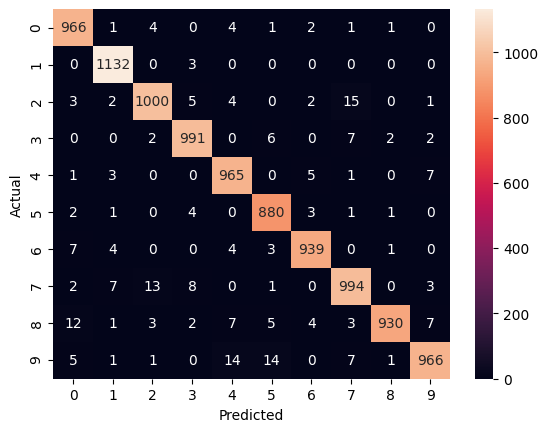

In [15]:
# Confusion Matrix

# Generates output predictions for the input samples.
test_predictions = model.predict(x=x_test)

# Returns the indices of the maximum values along an axis.
test_predictions = np.argmax(test_predictions,axis=1) # the prediction outputs 10 values, we take the index number of the highest value, which is the prediction of the model

# generate confusion matrix
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=test_predictions)

# plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
h = sns.heatmap(confusion_matrix,annot=True,fmt='d')
h.set(xlabel='Predicted', ylabel='Actual')